<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week12/CNN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{ForestGreen}{\text{CNN Models through TensorFlow}}$

In [1]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten 
from tensorflow.keras.models import Model, Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras.datasets import mnist   # Importing MNIST from tf


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Note the difference of tensor structures in torch and tf

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) 
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

percent_cap = 10  # Percentage of data to be included

X_train = X_train[:(X_train.shape[0]*percent_cap)//100]
X_test = X_test[:(X_test.shape[0]*percent_cap)//100]

# Converting target to categorical

y_train = to_categorical(y_train[:(y_train.shape[0]*percent_cap)//100]) 
y_test = to_categorical(y_test[:(y_test.shape[0]*percent_cap)//100])

print('Shape of X_train=%s and shape of y_train=%s' % (X_train.shape, y_train.shape))
print('Shape of X_test=%s and shape of y_test=%s' % (X_test.shape, y_test.shape))

Shape of X_train=(6000, 28, 28, 1) and shape of y_train=(6000, 10)
Shape of X_test=(1000, 28, 28, 1) and shape of y_test=(1000, 10)


In [3]:
def create_cnn_model(n_filter, ker, learning_rate):
    model = Sequential()
    # Note padding='SAME' automatically implements the right padding to get the same size output image
    model.add(Conv2D(n_filter, ker, activation='relu', padding='SAME', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    adam = Adam(learning_rate=learning_rate) 
    # Compiling the model with the given optimizer and loss function and calculating 'metrics'
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
# Creating a model with 16 filters of size (3,3) and learning rate 0.001

#del model
model = create_cnn_model(n_filter=16, ker=(3, 3), learning_rate=0.001)

In [5]:
# Presenting the summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 10)                125450    
                                                                 
Total params: 125,610
Trainable params: 125,610
Non-trainable params: 0
_________________________________________________________________


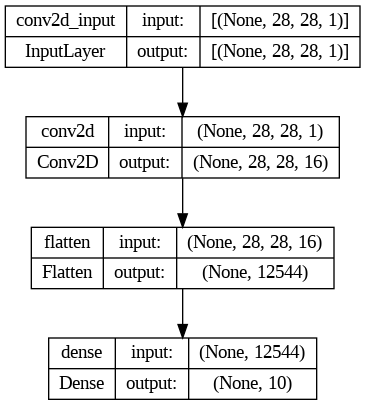

In [6]:
# Visualize the model's structure
 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
# Training the model for 30 epochs

epochs = 30

model_history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
188/188 [==============================] - 7s 30ms/step - loss: 4.4812 - accuracy: 0.8400 - val_loss: 1.0349 - val_accuracy: 0.8950
Epoch 2/30
188/188 [==============================] - 4s 19ms/step - loss: 0.3837 - accuracy: 0.9510 - val_loss: 0.7317 - val_accuracy: 0.9080
Epoch 3/30
188/188 [==============================] - 3s 13ms/step - loss: 0.1190 - accuracy: 0.9768 - val_loss: 0.8576 - val_accuracy: 0.9080
Epoch 4/30
188/188 [==============================] - 2s 12ms/step - loss: 0.0650 - accuracy: 0.9863 - val_loss: 0.6866 - val_accuracy: 0.9280
Epoch 5/30
188/188 [==============================] - 3s 13ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.6644 - val_accuracy: 0.9310
Epoch 6/30
188/188 [==============================] - 2s 13ms/step - loss: 0.0669 - accuracy: 0.9867 - val_loss: 0.7944 - val_accuracy: 0.9260
Epoch 7/30
188/188 [==============================] - 4s 19ms/step - loss: 0.0707 - accuracy: 0.9855 - val_loss: 0.8365 - val_accuracy: 0.9280

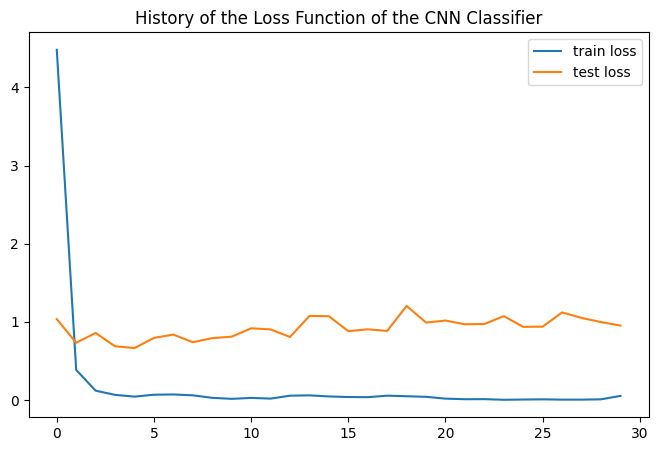

In [8]:
# Plotting the loss function from model's history
plt.figure(figsize=(8,5))
plt.plot(model_history.history['loss'], label = 'train loss')
plt.plot(model_history.history['val_loss'], label = 'test loss') 
plt.title('History of the Loss Function of the CNN Classifier')
plt.legend(['train loss', 'test loss'])
plt.show()

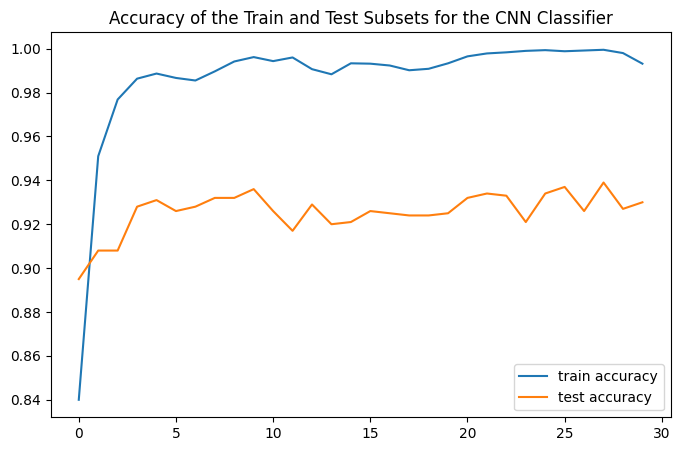

In [9]:
# Plotting accuracy score from model's history

plt.figure(figsize=(8,5))
plt.plot(model_history.history['accuracy'], label = 'train accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'test accuracy') 
plt.title('Accuracy of the Train and Test Subsets for the CNN Classifier')
plt.legend(['train accuracy', 'test accuracy'])
plt.show()